In [1]:
import numpy as np
from tqdm import tqdm
from torch_radon import Radon
from glob import glob
import pydicom
import torch
from torchvision.utils import save_image
import os
import torchvision.transforms as transforms
import torchvision.datasets as dset
import matplotlib.pyplot as plt
import math

# Read from DICOM to folders

In [7]:
read_folder = 'Data/LDCT-and-Projection-data/test'
write_folder_sino = 'Data/sinograms/test'
write_folder_rec = 'Data/reconstructions/test'

In [3]:
n_angles = 180
image_size = 512
bs = 64
angles = np.linspace(0, np.pi, n_angles, endpoint=False)
radon = Radon(image_size, angles, clip_to_circle=True)

In [8]:
try:
    if not os.path.exists(os.path.join(write_folder_sino, 'C')):
        os.makedirs(os.path.join(write_folder_sino, 'C'))
    if not os.path.exists(os.path.join(write_folder_rec, 'C')):
        os.makedirs(os.path.join(write_folder_rec, 'C'))
except OSError:
    pass

batch_images = []
cnt = 0

for fn in tqdm(glob(read_folder+'/C*/**/*dcm', recursive=True)):
    f = pydicom.dcmread(fn)
    
    if cnt%bs == 0 and cnt != 0:
        batch_images = torch.tensor(batch_images).view(bs,1,image_size,image_size).cuda()
        sinogram = radon.forward(batch_images)
        for i in range(bs):
            save_image(sinogram[i,0].permute(1,0), '%s/C/%d.png'%(write_folder_sino, cnt-bs+i) , normalize=True)
            save_image(batch_images[i,0], '%s/C/%d.png'%(write_folder_rec, cnt-bs+i) , normalize=True)
        batch_images = []
            
    batch_images.append(f.pixel_array.astype(np.float32))
    cnt += 1

batch_images = torch.tensor(batch_images).view(-1,1,image_size,image_size).cuda()
sinogram = radon.forward(batch_images)
for i in range(batch_images.size(0)):
    save_image(sinogram[i,0].permute(1,0), '%s/C/%d.png'%(write_folder_sino, cnt+i-batch_images.size(0)) , normalize=True)
    save_image(batch_images[i,0], '%s/C/%d.png'%(write_folder_rec, cnt+i-batch_images.size(0)) , normalize=True)

100%|██████████| 344/344 [00:33<00:00, 10.21it/s]


In [9]:
try:
    if not os.path.exists(os.path.join(write_folder_sino, 'L')):
        os.makedirs(os.path.join(write_folder_sino, 'L'))
    if not os.path.exists(os.path.join(write_folder_rec, 'L')):
        os.makedirs(os.path.join(write_folder_rec, 'L'))
except OSError:
    pass

batch_images = []
cnt = 0

for fn in tqdm(glob(read_folder+'/L*/**/*dcm', recursive=True)):
    f = pydicom.dcmread(fn)
    
    if cnt%bs == 0 and cnt != 0:
        batch_images = torch.tensor(batch_images).view(bs,1,image_size,image_size).cuda()
        sinogram = radon.forward(batch_images)
        for i in range(bs):
            save_image(sinogram[i,0].permute(1,0), '%s/L/%d.png'%(write_folder_sino, cnt-bs+i) , normalize=True)
            save_image(batch_images[i,0], '%s/L/%d.png'%(write_folder_rec, cnt-bs+i) , normalize=True)
        batch_images = []
            
    batch_images.append(f.pixel_array.astype(np.float32))
    cnt += 1
    
batch_images = torch.tensor(batch_images).view(-1,1,image_size,image_size).cuda()
sinogram = radon.forward(batch_images)
for i in range(batch_images.size(0)):
    save_image(sinogram[i,0].permute(1,0), '%s/L/%d.png'%(write_folder_sino, cnt+i-batch_images.size(0)) , normalize=True)
    save_image(batch_images[i,0], '%s/L/%d.png'%(write_folder_rec, cnt+i-batch_images.size(0)) , normalize=True)

100%|██████████| 139/139 [00:11<00:00, 12.26it/s]


In [10]:
try:
    if not os.path.exists(os.path.join(write_folder_sino, 'N')):
        os.makedirs(os.path.join(write_folder_sino, 'N'))
    if not os.path.exists(os.path.join(write_folder_rec, 'N')):
        os.makedirs(os.path.join(write_folder_rec, 'N'))
except OSError:
    pass

batch_images = []
cnt = 0

for fn in tqdm(glob(read_folder+'/N*/**/*dcm', recursive=True)):
    f = pydicom.dcmread(fn)
    
    if cnt%bs == 0 and cnt != 0:
        batch_images = torch.tensor(batch_images).view(bs,1,image_size,image_size).cuda()
        sinogram = radon.forward(batch_images)
        for i in range(bs):
            save_image(sinogram[i,0].permute(1,0), '%s/N/%d.png'%(write_folder_sino, cnt-bs+i) , normalize=True)
            save_image(batch_images[i,0], '%s/N/%d.png'%(write_folder_rec, cnt-bs+i) , normalize=True)
        batch_images = []
            
    batch_images.append(f.pixel_array.astype(np.float32))
    cnt += 1
    
batch_images = torch.tensor(batch_images).view(-1,1,image_size,image_size).cuda()
sinogram = radon.forward(batch_images)
for i in range(batch_images.size(0)):
    save_image(sinogram[i,0].permute(1,0), '%s/N/%d.png'%(write_folder_sino, cnt+i-batch_images.size(0)) , normalize=True)
    save_image(batch_images[i,0], '%s/N/%d.png'%(write_folder_rec, cnt+i-batch_images.size(0)) , normalize=True)

100%|██████████| 35/35 [00:00<00:00, 78.64it/s]


# Visualize

In [11]:
folder = 'Data/reconstructions/train'

In [12]:
# read data
dataset = dset.ImageFolder(root=folder,
                            transform=transforms.Compose([
                                transforms.Grayscale(),
                                transforms.ToTensor(),
                            ]))
print(dataset.class_to_idx)

{'C': 0, 'L': 1, 'N': 2}


In [ ]:
# select class
class_name = 'N'
class_idx = dataset.class_to_idx[class_name]
print(class_name,class_idx)
targets = torch.tensor(dataset.targets)
target_idx = np.nonzero(targets == class_idx)
print(len(target_idx))

In [14]:
bs = 25
# sampler = torch.utils.data.sampler.SubsetRandomSampler(target_idx)
# loader = torch.utils.data.DataLoader(dataset, sampler=sampler, batch_size=bs)
loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=bs)

torch.Size([25, 1, 512, 512])


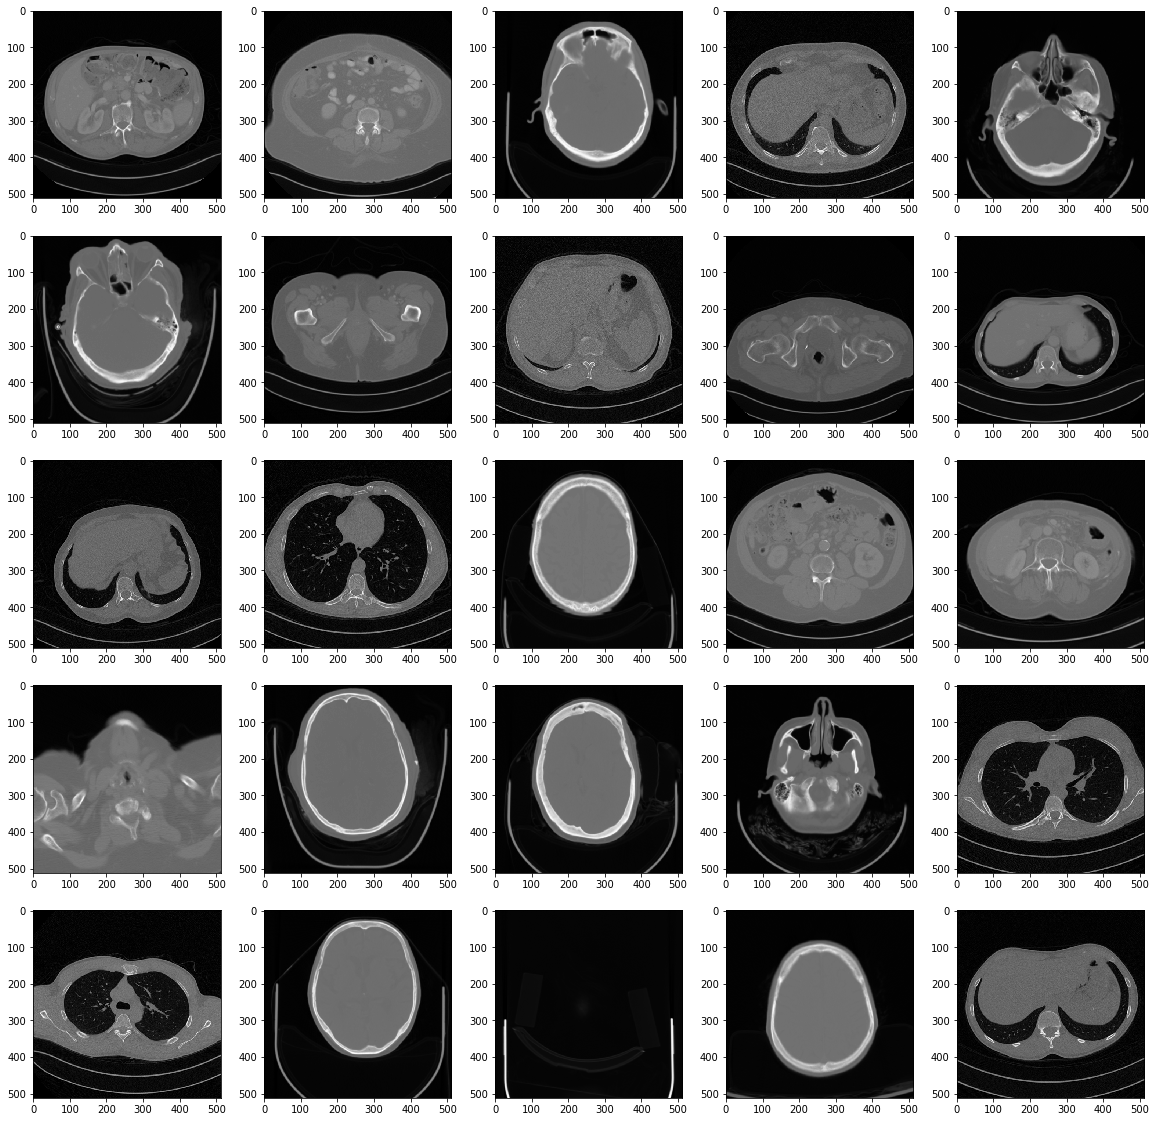

In [15]:
for _,data in enumerate(loader):
    samples = data[0]
    break
print(samples.size())
plt.figure(figsize=(20,20))
for i in range(bs):
    plt.subplot(5,5,i+1)
    plt.imshow(samples[i,0],cmap='gray')

In [ ]:
torch.min(samples[0,0])

# Augmentation

In [30]:
folder = 'Data/reconstructions/train'

In [31]:
# read data & transform
dataset = dset.ImageFolder(root=folder,
                            transform=transforms.Compose([
                                transforms.Grayscale(),
                                transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.5,1.1), shear=(-20,20,-20,20)),
                                transforms.ToTensor(),
                            ]))
print(dataset.class_to_idx)

{'C': 0, 'C_Aug': 1, 'L': 2, 'L_Aug': 3, 'N': 4, 'N_Aug': 5}


Change class_name for each class and repeat the following blocks

In [26]:
# select class
class_name = 'L'
class_idx = dataset.class_to_idx[class_name]
print(class_name,class_idx)
targets = torch.tensor(dataset.targets)
target_idx = np.nonzero(targets == class_idx)
print(len(target_idx))

L 1
1761


In [27]:
sampler = torch.utils.data.sampler.SubsetRandomSampler(target_idx)
loader = torch.utils.data.DataLoader(dataset, sampler=sampler, batch_size=len(target_idx))

torch.Size([1761, 1, 512, 512])


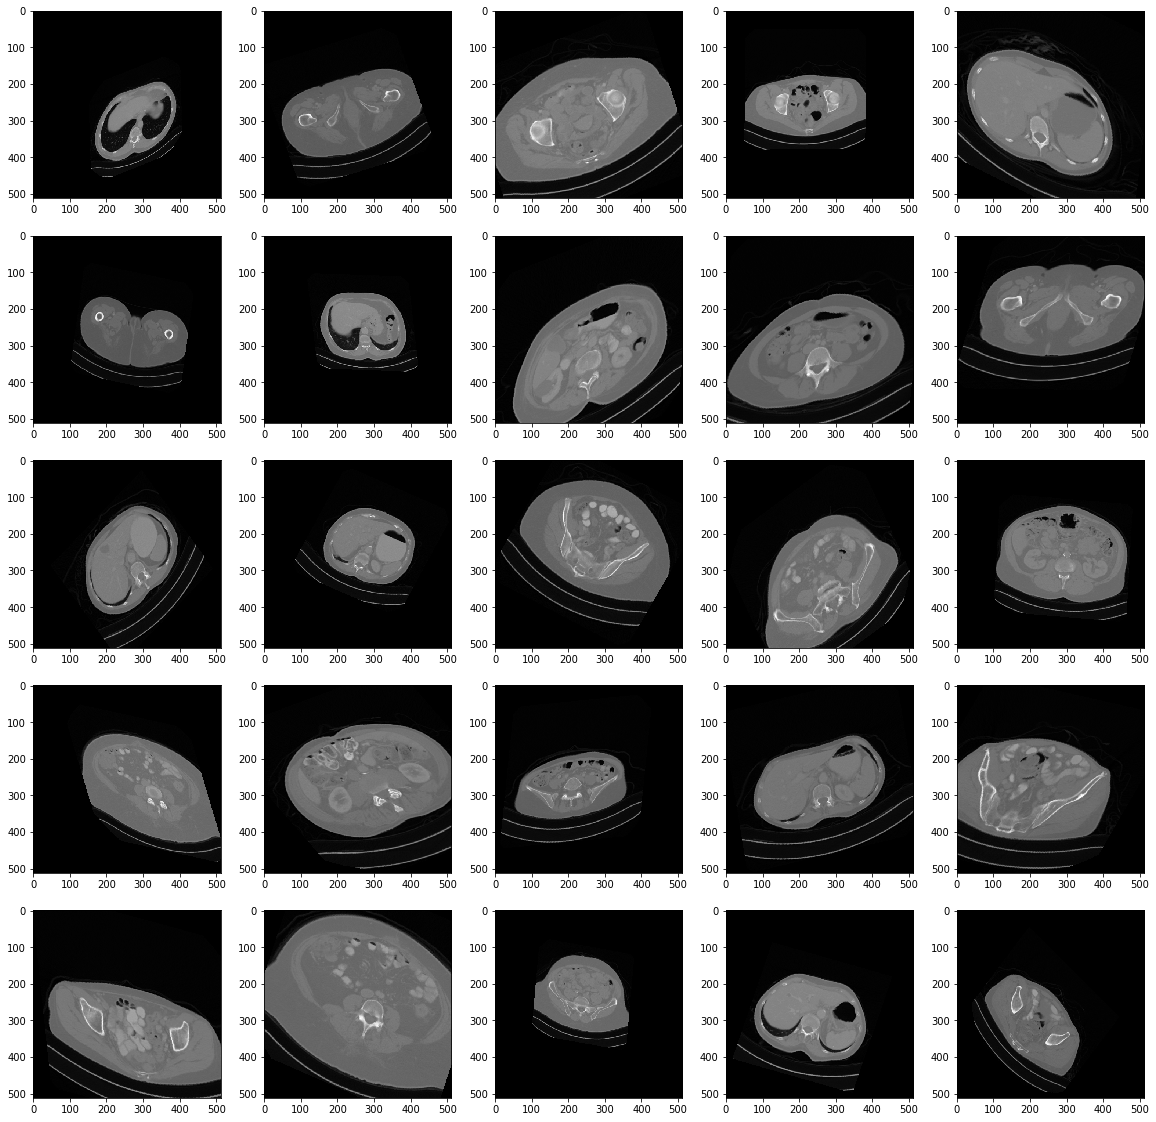

In [28]:
for _,data in enumerate(loader):
    samples = data[0]
    break
print(samples.size())
# visualize samples
plt.figure(figsize=(20,20))
for i in range(bs):
    plt.subplot(5,5,i+1)
    plt.imshow(samples[i,0],cmap='gray')

In [29]:
try:
    if not os.path.exists(os.path.join(folder, class_name+'_Aug')):
        os.makedirs(os.path.join(folder, class_name+'_Aug'))
except OSError:
    pass

for i in tqdm(range(samples.size(0))):
    img = samples[i,0]
    save_image(img, f'{folder}/{class_name}_Aug/{i}.png', normalize=True)    

100%|██████████| 1761/1761 [00:57<00:00, 30.70it/s]


# Generate Sinograms

In [32]:
read_folder = 'Data/reconstructions/train'
write_folder = 'Data/TCIA/sinograms/train'

In [38]:
mask = torch.zeros(180)
mask[::8].fill_(1)
angles = np.linspace(0,np.pi,180,endpoint=False)
radon = Radon(512, angles, clip_to_circle=True)

In [39]:
# read data
dataset = dset.ImageFolder(root=read_folder,
                            transform=transforms.Compose([
                                transforms.Grayscale(),
                                transforms.ToTensor(),
                            ]))
print(dataset.class_to_idx)

{'C': 0, 'C_Aug': 1, 'L': 2, 'L_Aug': 3, 'N': 4, 'N_Aug': 5}


In [49]:
# select class
class_name = 'N_Aug'
class_idx = dataset.class_to_idx[class_name]
print(class_name,class_idx)
targets = torch.tensor(dataset.targets)
target_idx = np.nonzero(targets == class_idx)
print(len(target_idx))

N_Aug 5
1677


In [50]:
bs = 64
subset = torch.utils.data.Subset(dataset, target_idx)
sampler = torch.utils.data.sampler.SequentialSampler(subset)
dataloader = torch.utils.data.DataLoader(subset, sampler=sampler, batch_size=bs)
fnames = sorted(sorted(os.walk(os.path.join(read_folder, class_name), followlinks=True))[0][2])
print(len(fnames))

In [ ]:
try:
    if not os.path.exists(os.path.join(write_folder, class_name)):
        os.makedirs(os.path.join(write_folder, class_name))
except OSError:
    pass

for i,data in tqdm(enumerate(loader)):
    samples = data[0].cuda()
    sinogram = radon.forward(samples)
    for j in range(sinogram.shape[0]):
        save_image(sinogram[j,0].permute(1,0), '%s/%s/%s'%(write_folder, class_name, fnames[i*bs+j]) , normalize=True)

# Generate Sparse and Full Reconstructions

In [34]:
read_folder = 'Data/reconstructions/test'
write_sparse = 'Data/sparse/test'
write_full = 'Data/GT/test'
write_sino = 'Data/sinograms/test'

In [35]:
mask = torch.zeros(180)
mask[::8].fill_(1)
angles = np.linspace(0,np.pi,180)
angles_sparse = angles[mask==1]
radon_full = Radon(512, angles)
radon_sparse = Radon(512, angles_sparse)

In [36]:
# read data
dataset = dset.ImageFolder(root=read_folder,
                            transform=transforms.Compose([
                                transforms.Grayscale(),
                                transforms.ToTensor(),
                            ]))
print(dataset.class_to_idx)

{'C': 0, 'L': 1, 'N': 2}


In [53]:
# select class
class_name = 'N'
class_idx = dataset.class_to_idx[class_name]
print(class_name,class_idx)
targets = torch.tensor(dataset.targets)
target_idx = np.nonzero(targets == class_idx)
print(len(target_idx))

N 2
35


In [54]:
bs = 64
sampler = torch.utils.data.sampler.SubsetRandomSampler(target_idx)
loader = torch.utils.data.DataLoader(dataset, sampler=sampler, batch_size=bs)

In [55]:
try:
    if not os.path.exists(os.path.join(write_full, class_name)):
        os.makedirs(os.path.join(write_full, class_name))
    if not os.path.exists(os.path.join(write_sparse, class_name)):
        os.makedirs(os.path.join(write_sparse, class_name))
    if not os.path.exists(os.path.join(write_sino, class_name)):
        os.makedirs(os.path.join(write_sino, class_name))
except OSError:
    pass

for i,data in tqdm(enumerate(loader)):
    samples = data[0].cuda()
    
    sinogram_full = radon_full.forward(samples)
    sinogram_sparse = radon_sparse.forward(samples)
    
    filtered_sinogram = radon_full.filter_sinogram(sinogram_full)
    fbp_full = radon_full.backprojection(filtered_sinogram)
    
    filtered_sinogram = radon_sparse.filter_sinogram(sinogram_sparse)
    fbp_sparse = radon_sparse.backprojection(filtered_sinogram)
    
    for j in range(fbp_full.shape[0]):
        save_image(fbp_full[j,0], '%s/%s/%d.png'%(write_full, class_name, i*bs+j), normalize=True)
        save_image(fbp_sparse[j,0], '%s/%s/%d.png'%(write_sparse, class_name, i*bs+j), normalize=True)
        save_image(sinogram_full[j,0].permute(1,0), '%s/%s/%d.png'%(write_sino, class_name, i*bs+j), normalize=True)        

1it [00:04,  4.42s/it]
